<a href="https://colab.research.google.com/github/kamalesh955/Phishing-website-detection/blob/main/phishing_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install ucimlrepo


In [ ]:
from ucimlrepo import fetch_ucirepo

# Fetch the Phishing Websites dataset
phishing_websites = fetch_ucirepo(id=327)

# Display metadata of the dataset
print(phishing_websites.metadata)

# Display information about the variables in the dataset
print(phishing_websites.variables)


{'uci_id': 327, 'name': 'Phishing Websites', 'repository_url': 'https://archive.ics.uci.edu/dataset/327/phishing+websites', 'data_url': 'https://archive.ics.uci.edu/static/public/327/data.csv', 'abstract': 'This dataset collected mainly from: PhishTank archive, MillerSmiles archive, Googleâ€™s searching operators.', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 11055, 'num_features': 30, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['result'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2012, 'last_updated': 'Tue Mar 05 2024', 'dataset_doi': '10.24432/C51W2X', 'creators': ['Rami Mohammad', 'Lee McCluskey'], 'intro_paper': {'ID': 396, 'type': 'NATIVE', 'title': 'An assessment of features related to phishing websites using an automated technique', 'authors': 'R. Mohammad, F. Thabtah, L. Mccluskey', 'venue': 'International Conference for Internet Tec

In [ ]:
# Features and target data as pandas DataFrames
X = phishing_websites.data.features
y = phishing_websites.data.targets

# Check the first few rows of features
print(X.head())

# Check the target labels
print(y.head())


   having_ip_address  url_length  shortining_service  having_at_symbol  \
0                 -1           1                   1                 1   
1                  1           1                   1                 1   
2                  1           0                   1                 1   
3                  1           0                   1                 1   
4                  1           0                  -1                 1   

   double_slash_redirecting  prefix_suffix  having_sub_domain  sslfinal_state  \
0                        -1             -1                 -1              -1   
1                         1             -1                  0               1   
2                         1             -1                 -1              -1   
3                         1             -1                 -1              -1   
4                         1             -1                  1               1   

   domain_registration_length  favicon  ...  rightclick  popupwindow

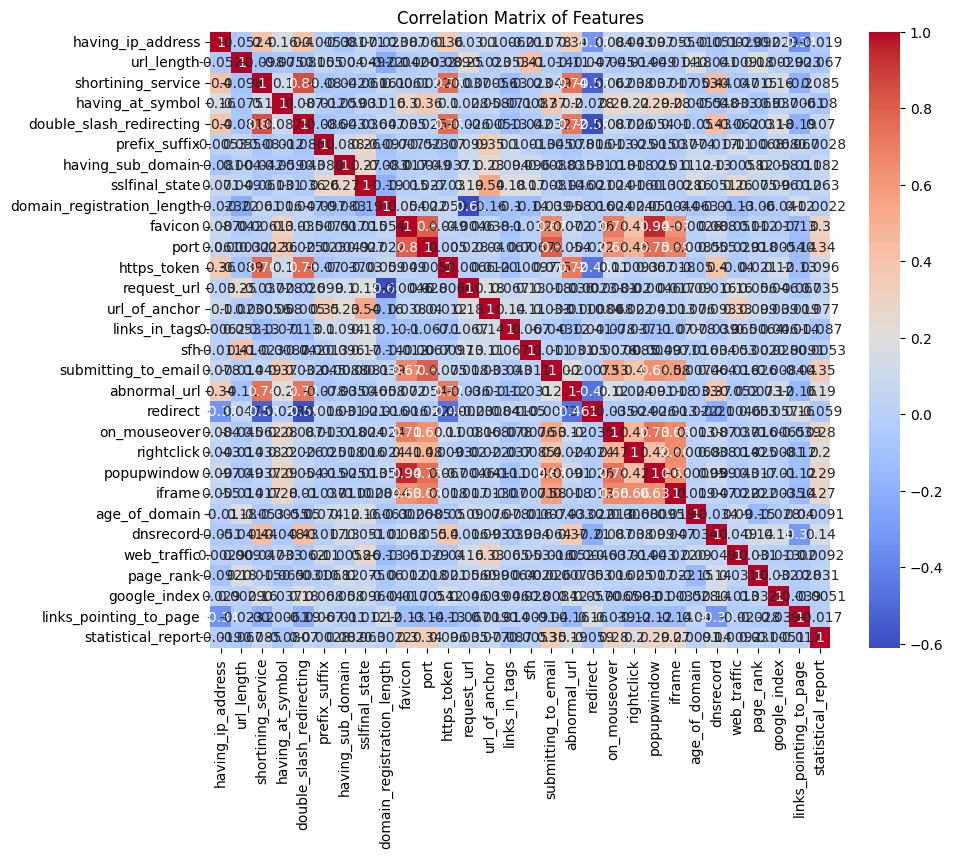

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the correlation matrix of features
plt.figure(figsize=(10, 8))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Features")
plt.show()


In [ ]:
# Check for missing values
print(X.isnull().sum())

# Convert categorical features into numerical using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Check the updated feature set
print(X.head())

# Standardize the features (Feature Scaling)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Check the scaled features
print(X_scaled[:5])


having_ip_address             0
url_length                    0
shortining_service            0
having_at_symbol              0
double_slash_redirecting      0
prefix_suffix                 0
having_sub_domain             0
sslfinal_state                0
domain_registration_length    0
favicon                       0
port                          0
https_token                   0
request_url                   0
url_of_anchor                 0
links_in_tags                 0
sfh                           0
submitting_to_email           0
abnormal_url                  0
redirect                      0
on_mouseover                  0
rightclick                    0
popupwindow                   0
iframe                        0
age_of_domain                 0
dnsrecord                     0
web_traffic                   0
page_rank                     0
google_index                  0
links_pointing_to_page        0
statistical_report            0
dtype: int64


NameError: name 'pd' is not defined

In [ ]:
import pandas as pd

In [ ]:
# Check for missing values
print(X.isnull().sum())

# Convert categorical features into numerical using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Check the updated feature set
print(X.head())

# Standardize the features (Feature Scaling)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Check the scaled features
print(X_scaled[:5])


having_ip_address             0
url_length                    0
shortining_service            0
having_at_symbol              0
double_slash_redirecting      0
prefix_suffix                 0
having_sub_domain             0
sslfinal_state                0
domain_registration_length    0
favicon                       0
port                          0
https_token                   0
request_url                   0
url_of_anchor                 0
links_in_tags                 0
sfh                           0
submitting_to_email           0
abnormal_url                  0
redirect                      0
on_mouseover                  0
rightclick                    0
popupwindow                   0
iframe                        0
age_of_domain                 0
dnsrecord                     0
web_traffic                   0
page_rank                     0
google_index                  0
links_pointing_to_page        0
statistical_report            0
dtype: int64
   having_ip_address  url_l

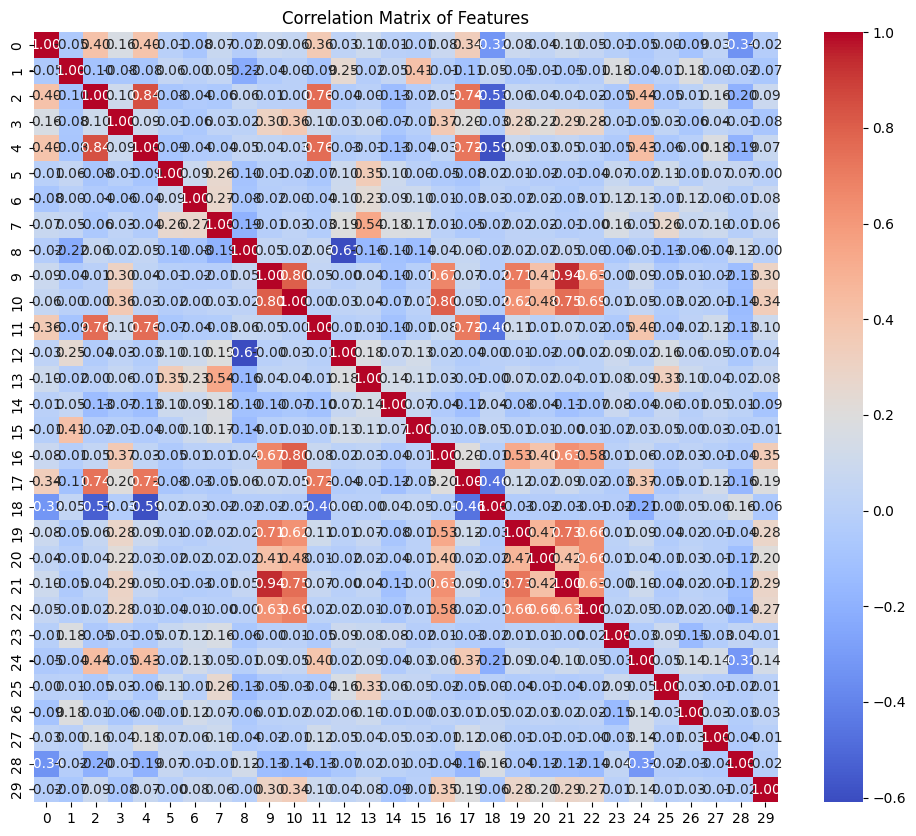

ValueError: If using all scalar values, you must pass an index

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(pd.DataFrame(X_scaled).corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix of Features")
plt.show()

# Visualize the distribution of the target variable
sns.countplot(x=y)
plt.title('Distribution of Phishing Websites (0 = Non-Phishing, 1 = Phishing)')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print("Classification Report:")
print(classification_report(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.9669832654907282
Classification Report:
              precision    recall  f1-score   support

          -1       0.97      0.95      0.96       956
           1       0.96      0.98      0.97      1255

    accuracy                           0.97      2211
   macro avg       0.97      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211



In [ ]:
# Initialize the Logistic Regression model
log_model = LogisticRegression(random_state=42)

# Train the model
log_model.fit(X_train, y_train)

# Make predictions
y_pred_log = log_model.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred_log)}")
print("Classification Report:")
print(classification_report(y_test, y_pred_log))


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.924468566259611
Classification Report:
              precision    recall  f1-score   support

          -1       0.92      0.90      0.91       956
           1       0.93      0.94      0.93      1255

    accuracy                           0.92      2211
   macro avg       0.92      0.92      0.92      2211
weighted avg       0.92      0.92      0.92      2211



In [ ]:
from sklearn.metrics import confusion_matrix

# Confusion Matrix for Random Forest
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Confusion Matrix for Logistic Regression
conf_matrix_log = confusion_matrix(y_test, y_pred_log)
print("Confusion Matrix for Logistic Regression:")
print(conf_matrix_log)


Confusion Matrix:
[[ 909   47]
 [  26 1229]]
Confusion Matrix for Logistic Regression:
[[ 865   91]
 [  76 1179]]


In [ ]:
# XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
xgb_predictions = xgb_model.predict(X_test)

# Evaluate the model
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
xgb_class_report = classification_report(y_test, xgb_predictions)
xgb_conf_matrix = confusion_matrix(y_test, xgb_predictions)

print(f"XGBoost Accuracy: {xgb_accuracy}")
print(f"XGBoost Classification Report:\n{xgb_class_report}")
print(f"XGBoost Confusion Matrix:\n{xgb_conf_matrix}")


NameError: name 'xgb' is not defined

In [ ]:
pip install xgboost lightgbm


In [ ]:
import pandas as pd
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import xgboost as xgb
import lightgbm as lgb


In [ ]:
# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
# Fetch phishing dataset
phishing_websites = fetch_ucirepo(id=327)

# Load the features and targets
X = phishing_websites.data.features
y = phishing_websites.data.targets


In [ ]:
# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
xgb_predictions = xgb_model.predict(X_test)

# Evaluate the model
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
xgb_class_report = classification_report(y_test, xgb_predictions)
xgb_conf_matrix = confusion_matrix(y_test, xgb_predictions)

print(f"XGBoost Accuracy: {xgb_accuracy}")
print(f"XGBoost Classification Report:\n{xgb_class_report}")
print(f"XGBoost Confusion Matrix:\n{xgb_conf_matrix}")


ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1], got [-1  1]

In [ ]:
# LightGBM model
lgb_model = lgb.LGBMClassifier()

# Train the model
lgb_model.fit(X_train, y_train)

# Make predictions
lgb_predictions = lgb_model.predict(X_test)

# Evaluate the model
lgb_accuracy = accuracy_score(y_test, lgb_predictions)
lgb_class_report = classification_report(y_test, lgb_predictions)
lgb_conf_matrix = confusion_matrix(y_test, lgb_predictions)

print(f"LightGBM Accuracy: {lgb_accuracy}")
print(f"LightGBM Classification Report:\n{lgb_class_report}")
print(f"LightGBM Confusion Matrix:\n{lgb_conf_matrix}")


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 4902, number of negative: 3942
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008378 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 89
[LightGBM] [Info] Number of data points in the train set: 8844, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.554274 -> initscore=0.217955
[LightGBM] [Info] Start training from score 0.217955
LightGBM Accuracy: 0.9656264133876075
LightGBM Classification Report:
              precision    recall  f1-score   support

          -1       0.97      0.95      0.96       956
           1       0.96      0.98      0.97      1255

    accuracy                           0.97      2211
   macro avg       0.97      0.96      0.96      2211
weighted avg       0.97      0.97      0.97      2211

LightGBM Confusion Matrix:
[[ 907   49]
 [  27 1228]

In [ ]:
import pandas as pd
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import xgboost as xgb
import lightgbm as lgb

# Fetch phishing dataset
phishing_websites = fetch_ucirepo(id=327)

# Load the features and targets
X = phishing_websites.data.features
y = phishing_websites.data.targets

# Convert y (target labels) from -1, 1 to 0, 1
y = y.replace({-1: 0, 1: 1})

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost model without use_label_encoder
xgb_model = xgb.XGBClassifier(eval_metric='mlogloss')

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
xgb_predictions = xgb_model.predict(X_test)

# Evaluate the model
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
xgb_class_report = classification_report(y_test, xgb_predictions)
xgb_conf_matrix = confusion_matrix(y_test, xgb_predictions)

print(f"XGBoost Accuracy: {xgb_accuracy}")
print(f"XGBoost Classification Report:\n{xgb_class_report}")
print(f"XGBoost Confusion Matrix:\n{xgb_conf_matrix}")


# LightGBM model
lgb_model = lgb.LGBMClassifier()

# Train the model
lgb_model.fit(X_train, y_train)

# Make predictions
lgb_predictions = lgb_model.predict(X_test)

# Evaluate the model
lgb_accuracy = accuracy_score(y_test, lgb_predictions)
lgb_class_report = classification_report(y_test, lgb_predictions)
lgb_conf_matrix = confusion_matrix(y_test, lgb_predictions)

print(f"LightGBM Accuracy: {lgb_accuracy}")
print(f"LightGBM Classification Report:\n{lgb_class_report}")
print(f"LightGBM Confusion Matrix:\n{lgb_conf_matrix}")



XGBoost Accuracy: 0.9706015377657169
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.97       956
           1       0.96      0.98      0.97      1255

    accuracy                           0.97      2211
   macro avg       0.97      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211

XGBoost Confusion Matrix:
[[ 911   45]
 [  20 1235]]
[LightGBM] [Info] Number of positive: 4902, number of negative: 3942
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003967 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 89
[LightGBM] [Info] Number of data points in the train set: 8844, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.554274 -> initscore=0.217955
[LightGBM] [Info] Start training from score 0.217955


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


LightGBM Accuracy: 0.9656264133876075
LightGBM Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       956
           1       0.96      0.98      0.97      1255

    accuracy                           0.97      2211
   macro avg       0.97      0.96      0.96      2211
weighted avg       0.97      0.97      0.97      2211

LightGBM Confusion Matrix:
[[ 907   49]
 [  27 1228]]


In [ ]:
# XGBoost model without use_label_encoder
xgb_model = xgb.XGBClassifier(eval_metric='mlogloss')

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
xgb_predictions = xgb_model.predict(X_test)

# Evaluate the model
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
xgb_class_report = classification_report(y_test, xgb_predictions)
xgb_conf_matrix = confusion_matrix(y_test, xgb_predictions)

print(f"XGBoost Accuracy: {xgb_accuracy}")
print(f"XGBoost Classification Report:\n{xgb_class_report}")
print(f"XGBoost Confusion Matrix:\n{xgb_conf_matrix}")


XGBoost Accuracy: 0.9706015377657169
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.97       956
           1       0.96      0.98      0.97      1255

    accuracy                           0.97      2211
   macro avg       0.97      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211

XGBoost Confusion Matrix:
[[ 911   45]
 [  20 1235]]
